In [6]:
from models.vit_lit import VitModel
from models.modeling import CONFIGS
from utils.data_utils import get_loader
import torch
import pytorch_lightning as pl

In [4]:
config = CONFIGS['ViT-B_16']

In [9]:
model = VitModel(config, args, 10)

In [3]:
model = VitModel(config, 224, 10)
model.model.load_state_dict(torch.load('/home/haotian/Workspace/attention_gradient/ViT-pytorch/output/cifar10-100_500_checkpoint.bin'))

<All keys matched successfully>

In [10]:
model.summarize()

/home/haotian/Enviroments/env1/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3397: LightningDeprecationWarning: The `LightningModule.summarize` method is deprecated in v1.5 and will be removed in v1.7. Use `pytorch_lightning.utilities.model_summary.summarize` instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


  | Name  | Type              | Params
--------------------------------------------
0 | model | VisionTransformer | 29.0 M
--------------------------------------------
29.0 M    Trainable params
0         Non-trainable params
29.0 M    Total params
115.943   Total estimated model params size (MB)

In [4]:
model.summarize()

/home/haotian/Enviroments/env1/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3397: LightningDeprecationWarning: The `LightningModule.summarize` method is deprecated in v1.5 and will be removed in v1.7. Use `pytorch_lightning.utilities.model_summary.summarize` instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


  | Name  | Type              | Params
--------------------------------------------
0 | model | VisionTransformer | 85.8 M
--------------------------------------------
85.8 M    Trainable params
0         Non-trainable params
85.8 M    Total params
343.225   Total estimated model params size (MB)

In [7]:
import argparse
import shlex
def main(cmd=''):
    parser = argparse.ArgumentParser()
    # Required parameters
    parser.add_argument("--name", required=True,
                        help="Name of this run. Used for monitoring.")
    parser.add_argument("--dataset", choices=["cifar10", "cifar100"], default="cifar10",
                        help="Which downstream task.")
    parser.add_argument("--model_type", choices=["ViT-B_16", "ViT-B_32", "ViT-L_16",
                                                 "ViT-L_32", "ViT-H_14", "R50-ViT-B_16"],
                        default="ViT-B_16",
                        help="Which variant to use.")
    parser.add_argument("--pretrained_dir", type=str, default="checkpoint/ViT-B_16.npz",
                        help="Where to search for pretrained ViT models.")
    parser.add_argument("--output_dir", default="output", type=str,
                        help="The output directory where checkpoints will be written.")

    parser.add_argument("--img_size", default=224, type=int,
                        help="Resolution size")
    parser.add_argument("--train_batch_size", default=512, type=int,
                        help="Total batch size for training.")
    parser.add_argument("--eval_batch_size", default=64, type=int,
                        help="Total batch size for eval.")
    parser.add_argument("--eval_every", default=100, type=int,
                        help="Run prediction on validation set every so many steps."
                             "Will always run one evaluation at the end of training.")

    parser.add_argument("--learning_rate", default=3e-2, type=float,
                        help="The initial learning rate for SGD.")
    parser.add_argument("--weight_decay", default=0, type=float,
                        help="Weight deay if we apply some.")
    parser.add_argument("--num_steps", default=10000, type=int,
                        help="Total number of training epochs to perform.")
    parser.add_argument("--decay_type", choices=["cosine", "linear"], default="cosine",
                        help="How to decay the learning rate.")
    parser.add_argument("--warmup_steps", default=500, type=int,
                        help="Step of training to perform learning rate warmup for.")
    parser.add_argument("--max_grad_norm", default=1.0, type=float,
                        help="Max gradient norm.")

    parser.add_argument("--local_rank", type=int, default=-1,
                        help="local_rank for distributed training on gpus")
    parser.add_argument('--seed', type=int, default=42,
                        help="random seed for initialization")
    parser.add_argument('--gradient_accumulation_steps', type=int, default=1,
                        help="Number of updates steps to accumulate before performing a backward/update pass.")
    parser.add_argument('--fp16', action='store_true',
                        help="Whether to use 16-bit float precision instead of 32-bit")
    parser.add_argument('--fp16_opt_level', type=str, default='O2',
                        help="For fp16: Apex AMP optimization level selected in ['O0', 'O1', 'O2', and 'O3']."
                             "See details at https://nvidia.github.io/apex/amp.html")
    parser.add_argument('--loss_scale', type=float, default=0,
                        help="Loss scaling to improve fp16 numeric stability. Only used when fp16 set to True.\n"
                             "0 (default value): dynamic loss scaling.\n"
                             "Positive power of 2: static loss scaling value.\n")
    if cmd != '':
        args = parser.parse_args(cmd)
    else:
        args = parser.parse_args()

    return args 

In [8]:
args = main(shlex.split('--name cifar10-100_500 --dataset cifar10 --model_type ViT-B_16 --pretrained_dir checkpoint/ViT-B_16.npz --gradient_accumulation_steps 10'))

In [7]:
train_loader, test_loader = get_loader(args)

pl.Trainer(accelerator="gpu", devices=[1,]).validate(model=model, dataloaders=test_loader)

Files already downloaded and verified
Files already downloaded and verified


/home/haotian/Enviroments/env1/lib/python3.10/site-packages/pytorch_lightning/loops/utilities.py:91: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Validation: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     valid_accuracy                0.989
       valid_loss           0.0399663969874382
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'valid_loss': 0.0399663969874382, 'valid_accuracy': 0.989}]

In [8]:
model.validation_epoch_end()

TypeError: VitModel.validation_epoch_end() missing 1 required positional argument: 'outputs'

In [9]:
import numpy as np

l = [np.array([1,2]), np.array([2,3])]

In [12]:
np.stack(l, axis=1)

array([[1, 2],
       [2, 3]])

In [9]:
from numpy import array

output = [(array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0,
       4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6,
       0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3]), array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0,
       4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6,
       0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3])), (array([6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 8, 1, 7, 2, 5,
       2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6,
       8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3]), array([6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5,
       2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6,
       8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3])), (array([5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2,
       8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9,
       9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8]), array([5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2,
       8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9,
       9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8])), (array([0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 8,
       8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 0, 4, 7, 6, 5, 1, 5, 8, 8, 0,
       4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0]), array([0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9,
       8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0,
       4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0])), (array([3, 0, 0, 9, 8, 1, 5, 7, 8, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3,
       4, 3, 9, 0, 6, 1, 0, 9, 1, 0, 7, 9, 1, 2, 6, 9, 3, 4, 6, 0, 0, 6,
       6, 6, 3, 2, 6, 1, 8, 2, 1, 6, 8, 6, 8, 0, 4, 0, 7, 7, 5, 5]), array([3, 0, 0, 9, 8, 1, 5, 7, 0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3,
       4, 3, 9, 0, 6, 1, 0, 9, 1, 0, 7, 9, 1, 2, 6, 9, 3, 4, 6, 0, 0, 6,
       6, 6, 3, 2, 6, 1, 8, 2, 1, 6, 8, 6, 8, 0, 4, 0, 7, 7, 5, 5])), (array([3, 5, 2, 3, 4, 1, 7, 5, 4, 6, 1, 9, 3, 6, 6, 9, 3, 8, 0, 7, 2, 6,
       2, 5, 8, 5, 4, 6, 8, 9, 9, 1, 0, 2, 2, 7, 3, 2, 8, 0, 9, 5, 8, 1,
       9, 4, 1, 3, 8, 1, 4, 7, 9, 4, 2, 7, 0, 7, 0, 6, 6, 9, 0, 9]), array([3, 5, 2, 3, 4, 1, 7, 5, 4, 6, 1, 9, 3, 6, 6, 9, 3, 8, 0, 7, 2, 6,
       2, 5, 8, 5, 4, 6, 8, 9, 9, 1, 0, 2, 2, 7, 3, 2, 8, 0, 9, 5, 8, 1,
       9, 4, 1, 3, 8, 1, 4, 7, 9, 4, 2, 7, 0, 7, 0, 6, 6, 9, 0, 9])), (array([2, 8, 7, 2, 2, 5, 1, 2, 6, 2, 9, 6, 2, 3, 0, 3, 9, 8, 7, 8, 8, 4,
       0, 1, 8, 2, 7, 9, 3, 6, 1, 9, 0, 7, 3, 7, 4, 5, 0, 0, 2, 9, 3, 4,
       0, 6, 2, 5, 3, 7, 3, 7, 2, 5, 3, 1, 1, 4, 9, 9, 5, 7, 5, 0]), array([2, 8, 7, 2, 2, 5, 1, 2, 6, 2, 9, 6, 2, 3, 0, 3, 9, 8, 7, 8, 8, 4,
       0, 1, 8, 2, 7, 9, 3, 6, 1, 9, 0, 7, 3, 7, 4, 5, 0, 0, 2, 9, 3, 4,
       0, 6, 2, 5, 3, 7, 3, 7, 2, 5, 3, 1, 1, 4, 9, 9, 5, 7, 5, 0])), (array([2, 2, 2, 9, 7, 3, 9, 4, 3, 5, 4, 6, 5, 6, 1, 4, 3, 4, 4, 3, 7, 8,
       3, 7, 8, 0, 5, 7, 6, 0, 5, 4, 8, 6, 8, 5, 5, 9, 9, 9, 5, 0, 1, 0,
       8, 1, 1, 8, 0, 2, 2, 0, 4, 6, 5, 4, 9, 4, 7, 9, 9, 4, 5, 6]), array([2, 2, 2, 9, 7, 3, 9, 4, 3, 5, 4, 6, 5, 6, 1, 4, 3, 4, 4, 3, 7, 8,
       3, 7, 8, 0, 5, 7, 6, 0, 5, 4, 8, 6, 8, 5, 5, 9, 9, 9, 5, 0, 1, 0,
       8, 1, 1, 8, 0, 2, 2, 0, 4, 6, 5, 4, 9, 4, 7, 9, 9, 4, 5, 6])), (array([6, 1, 5, 3, 8, 9, 5, 8, 5, 7, 0, 7, 0, 5, 0, 0, 4, 6, 9, 0, 9, 5,
       6, 6, 6, 2, 9, 0, 1, 7, 6, 7, 5, 9, 1, 6, 2, 5, 5, 5, 8, 5, 9, 4,
       6, 4, 3, 2, 0, 7, 6, 2, 2, 3, 9, 7, 9, 2, 6, 7, 1, 3, 6, 6]), array([6, 1, 5, 3, 8, 9, 5, 8, 5, 7, 0, 7, 0, 5, 0, 0, 4, 6, 9, 0, 9, 5,
       6, 6, 6, 2, 9, 0, 1, 7, 6, 7, 5, 9, 1, 6, 2, 5, 5, 5, 8, 5, 9, 4,
       6, 4, 3, 2, 0, 7, 6, 2, 2, 3, 9, 7, 9, 2, 6, 7, 1, 3, 6, 6])), (array([8, 9, 7, 5, 4, 0, 8, 4, 0, 9, 3, 4, 8, 9, 6, 9, 2, 6, 1, 4, 7, 3,
       5, 3, 8, 5, 0, 2, 1, 6, 4, 3, 3, 9, 6, 9, 8, 8, 5, 8, 6, 6, 2, 1,
       7, 7, 1, 2, 7, 9, 9, 4, 4, 1, 2, 5, 6, 8, 7, 6, 8, 3, 0, 5]), array([8, 9, 7, 5, 4, 0, 8, 4, 0, 9, 3, 4, 8, 9, 6, 9, 2, 6, 1, 4, 7, 3,
       5, 3, 8, 5, 0, 2, 1, 6, 4, 3, 3, 9, 6, 9, 8, 8, 5, 8, 6, 6, 2, 1,
       7, 7, 1, 2, 7, 9, 9, 4, 4, 1, 2, 5, 6, 8, 7, 6, 8, 3, 0, 5])), (array([5, 3, 0, 7, 9, 1, 3, 4, 4, 5, 3, 9, 5, 6, 9, 2, 1, 1, 4, 1, 9, 4,
       7, 6, 3, 8, 9, 0, 1, 3, 6, 3, 6, 3, 2, 0, 3, 1, 0, 5, 9, 6, 4, 8,
       9, 6, 9, 6, 3, 0, 3, 2, 2, 7, 8, 3, 8, 2, 7, 5, 7, 2, 4, 8]), array([5, 3, 0, 7, 9, 1, 3, 4, 4, 5, 3, 9, 5, 6, 9, 2, 1, 1, 4, 1, 9, 4,
       7, 6, 3, 8, 9, 0, 1, 3, 6, 3, 6, 3, 2, 0, 3, 1, 0, 5, 9, 6, 4, 8,
       9, 6, 9, 6, 3, 0, 3, 2, 2, 7, 8, 3, 8, 2, 7, 5, 7, 2, 4, 8])), (array([7, 4, 2, 9, 8, 8, 6, 8, 8, 7, 4, 3, 3, 8, 4, 9, 4, 8, 8, 1, 8, 2,
       1, 3, 6, 5, 4, 2, 7, 9, 9, 4, 1, 4, 1, 3, 2, 7, 0, 7, 9, 7, 6, 6,
       2, 5, 9, 2, 9, 1, 2, 2, 6, 8, 2, 1, 3, 6, 6, 0, 1, 2, 7, 0]), array([7, 4, 2, 9, 8, 8, 6, 8, 8, 7, 4, 3, 3, 8, 4, 9, 4, 8, 8, 1, 8, 2,
       1, 3, 6, 5, 4, 2, 7, 9, 9, 4, 1, 4, 1, 3, 2, 7, 0, 7, 9, 7, 6, 6,
       2, 5, 9, 2, 9, 1, 2, 2, 6, 8, 2, 1, 3, 6, 6, 0, 1, 2, 7, 0])), (array([5, 4, 6, 1, 6, 4, 0, 2, 2, 6, 0, 5, 9, 1, 7, 6, 7, 0, 3, 9, 6, 8,
       3, 0, 3, 4, 7, 7, 1, 4, 7, 2, 7, 1, 4, 7, 4, 4, 8, 4, 7, 7, 3, 3,
       7, 2, 0, 8, 9, 5, 8, 3, 6, 2, 0, 8, 7, 3, 7, 6, 5, 3, 1, 3]), array([5, 4, 6, 1, 6, 4, 0, 2, 2, 6, 0, 5, 9, 1, 7, 6, 7, 0, 3, 9, 6, 8,
       3, 0, 3, 4, 7, 7, 1, 4, 7, 2, 7, 1, 4, 7, 4, 4, 8, 4, 7, 7, 5, 3,
       7, 2, 0, 8, 9, 5, 8, 3, 6, 2, 0, 8, 7, 3, 7, 6, 5, 3, 1, 3])), (array([2, 2, 5, 4, 1, 2, 9, 2, 7, 0, 7, 2, 1, 3, 2, 0, 2, 4, 7, 9, 8, 9,
       0, 7, 7, 0, 7, 8, 4, 6, 3, 3, 0, 1, 3, 7, 0, 1, 3, 1, 4, 2, 3, 8,
       4, 2, 3, 7, 8, 4, 3, 0, 9, 0, 0, 1, 0, 4, 4, 6, 7, 6, 1, 1]), array([2, 2, 5, 4, 1, 2, 9, 2, 7, 0, 7, 2, 1, 3, 2, 0, 2, 4, 7, 9, 8, 9,
       0, 7, 7, 0, 7, 8, 4, 6, 3, 3, 0, 1, 3, 7, 0, 1, 3, 1, 4, 2, 3, 8,
       4, 2, 3, 7, 8, 4, 3, 0, 9, 0, 0, 1, 0, 4, 4, 6, 7, 6, 1, 1])), (array([3, 7, 3, 5, 2, 6, 6, 5, 8, 7, 1, 6, 8, 8, 5, 3, 0, 4, 0, 1, 3, 8,
       8, 0, 6, 9, 9, 9, 5, 5, 8, 6, 0, 0, 4, 2, 3, 2, 7, 2, 2, 5, 9, 8,
       9, 1, 7, 4, 0, 3, 0, 1, 3, 8, 3, 9, 6, 1, 4, 7, 0, 3, 7, 8]), array([3, 7, 3, 5, 2, 6, 6, 5, 8, 7, 1, 6, 8, 8, 5, 3, 0, 4, 0, 1, 3, 8,
       8, 0, 6, 9, 9, 9, 5, 5, 8, 6, 0, 0, 4, 2, 3, 2, 7, 2, 2, 5, 9, 8,
       9, 1, 7, 4, 0, 3, 0, 1, 3, 8, 3, 9, 6, 1, 4, 7, 0, 3, 7, 8])), (array([9, 1, 1, 6, 6, 6, 6, 9, 1, 9, 9, 4, 2, 1, 7, 0, 6, 8, 1, 9, 2, 9,
       0, 4, 7, 8, 3, 1, 2, 0, 1, 5, 8, 4, 6, 3, 8, 1, 3, 8]), array([9, 1, 1, 6, 6, 6, 6, 9, 1, 9, 9, 4, 2, 1, 7, 0, 6, 8, 1, 9, 2, 9,
       0, 4, 7, 8, 3, 1, 2, 0, 1, 5, 8, 4, 6, 3, 8, 1, 3, 8]))]


In [11]:
pred = [out[0] for out in output]
label = [out[1] for out in output]

In [18]:
import numpy as np
pred = np.concatenate(pred)
label = np.con

In [20]:
pred

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0,
       4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6,
       0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2,
       1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 8, 1, 7, 2, 5, 2, 7,
       8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7,
       4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1,
       8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0,
       0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9,
       3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8,
       7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 8, 8, 0, 7, 9, 8, 2,
       7, 6, 9, 4, 3, 9, 0, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1,
       8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7,
       8, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3, 4, 3, 9, 0, 6, 1, 0, 9,
       1, 0, 7, 9, 1, 2, 6, 9, 3, 4, 6, 0, 0, 6, 6,

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(font_scale=1.5)

In [6]:
m = np.array([1,2,3,5, 6, 7, 8, 10, 14, 16, 20, 24,25,30, 32, 35, 40, 50, 64])
e = np.array([1.75, 1.61, 1.58, 1.50, 1.48, 1.47, 1.45, 1.43, 1.39 ,1.39, 1.38, 1.34, 1.34, 1.32, 1.32, 1.31, 1.31, 1.30, 1.29])

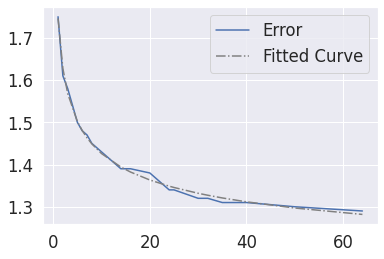

In [13]:
plt.plot(m, e, label='Error')
plt.plot(m,  0.6785600* m**(-0.2770410)+1.067480 , '-.', color='grey', label='Fitted Curve')
plt.legend()
plt.savefig('a.png', dpi=800)